In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

In [458]:
data = pd.read_csv('dataframe/champions.csv')

In [459]:
data.head()

,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,121,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,18.743616,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422
1,122,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148
2,123,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,18.490575,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168
3,124,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,28.153728,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874
4,125,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,19.353798,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387


In [460]:
data['Temporada'] = pd.to_datetime(data['Temporada'])
data = data.sort_values(by='Temporada')  # Ordenar por temporada
data.set_index('Temporada', inplace=True)  # Establecer la temporada como índice


### ARIMA

In [461]:
def plot_data(data, equipo):
    equipo_local = data[data['Local'] == equipo].groupby('Temporada')['GolesLocal'].sum()
    equipo_visitante = data[data['Visitante'] == equipo].groupby('Temporada')['GolesVisitante'].sum()

    # Crear una figura y un eje
    fig, ax = plt.subplots(figsize=(12, 6))

    # Graficar goles como local
    ax.plot(equipo_local.index, equipo_local.values, marker='o', linestyle='-', color='blue', label='Goles como Local')

    # Graficar goles como visitante
    ax.plot(equipo_visitante.index, equipo_visitante.values, marker='x', linestyle='--', color='green', label='Goles como Visitante')

    # Configuración del gráfico
    ax.set_xlabel('Temporada')
    ax.set_ylabel('Goles')
    ax.set_title(f'Goles por Temporada - Equipo {equipo}')
    ax.legend()
    ax.grid(True)

    plt.show()

def arima_model(data, equipo, order):
    equipo_data = data[(data['Local'] == equipo) | (data['Visitante'] == equipo)]
    model = ARIMA(equipo_data['GolesLocal'], order=order)
    result = model.fit()
    return result

def forecast(result, steps):
    forecast = result.forecast(steps=steps)
    print(forecast)
    return forecast


In [462]:
data.head()

,idPartido,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,VictoriaVisitante,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
Temporada,,,,,,,,,,,,,,,,,,,,,
2003-01-01,2614,Final,27,12,Arena AufSchalke (Neutral Site),0,3,0,0,1,...,38.995418,50.00,66.67,16.67,16.67,0.50,0.67,1.42,764.472223,34.748737
2003-01-01,2522,Group stage,43,31,NSK Olimpiyskyi,2,1,1,0,0,...,20.916148,55.56,60.00,0.00,40.00,0.56,0.60,1.67,577.060522,32.058918
2003-01-01,2523,Group stage,186,7,Stadion Lokomotiv,3,0,1,0,0,...,22.683605,40.00,33.33,33.33,33.33,0.40,0.33,1.60,409.773551,18.626071
2003-01-01,2524,Group stage,61,27,Estadio Municipal de Riazor,1,0,1,0,0,...,33.126024,50.00,71.43,14.29,14.29,0.50,0.71,2.25,779.908354,38.995418
2003-01-01,2525,Group stage,95,21,Apostolos Nikolaidis,0,1,0,0,1,...,17.635001,40.00,66.67,0.00,33.33,0.40,0.67,1.40,393.729586,20.722610


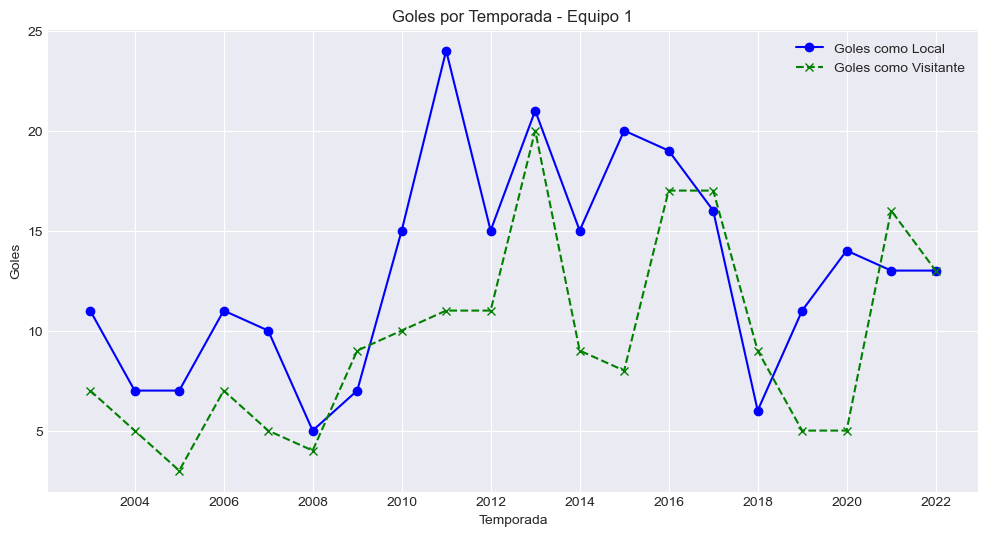

211    1.774946
212    1.820289
213    1.819651
214    1.819660
215    1.819660
Name: predicted_mean, dtype: float64


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Predicti

In [463]:
# Visualizar la serie temporal para el equipo 1
plot_data(data, equipo=1)

# Ajustar un modelo ARIMA para el equipo 1
modelo_arima = arima_model(data, equipo=1, order=(1,1,1))

# Realizar un pronóstico para el equipo 1
pronostico_arima = forecast(modelo_arima, steps=5)


### SARIMA

In [465]:
def sarima_model(data, equipo, order, seasonal_order):
    equipo_data = data[(data['Local'] == equipo) | (data['Visitante'] == equipo)]
    model = SARIMAX(equipo_data['GolesLocal'], order=order, seasonal_order=seasonal_order)
    result = model.fit()
    return result

modelo_sarima = sarima_model(data, equipo=1, order=(1,1,1), seasonal_order=(1,1,1,12))
pronostico_sarima = forecast(modelo_sarima, steps=5)

pronostico_sarima


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97110D+00    |proj g|=  1.65635D-01

At iterate    5    f=  1.80020D+00    |proj g|=  2.03809D-02

At iterate   10    f=  1.78354D+00    |proj g|=  4.44628D-03

At iterate   15    f=  1.78208D+00    |proj g|=  2.44126D-03

At iterate   20    f=  1.78189D+00    |proj g|=  8.37988D-04

At iterate   25    f=  1.78187D+00    |proj g|=  1.31121D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     35      1     0     0   

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


211    1.255650
212    1.467220
213    1.372339
214    1.407052
215    2.358938
Name: predicted_mean, dtype: float64

In [467]:
modelo_arima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             GolesLocal   No. Observations:                  211
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -379.522
Date:                Thu, 11 Apr 2024   AIC                            765.044
Time:                        12:39:25   BIC                            775.085
Sample:                             0   HQIC                           769.103
                                - 211                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0141      0.065     -0.216      0.829      -0.142       0.114
ma.L1         -0.9994      0.467     -2.138      0.033      -1.916      -0.083
sigma2         2.1202      1.011      2.096      0.036       0.138       4.102
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                29.96
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.82
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""